In [18]:
from src.datasets.patch_tumor_classify_diffusion_datamodule import BraTSDataModule
import yaml
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import nibabel as nib
import os
import numpy as np
from einops import repeat, rearrange, reduce


In [5]:
with open('/home/sanyal/Projects/BraTS3DDiff/configs/data/brats23_patch_tumor_classify_diffusion.yaml') as f:
    cfg = yaml.safe_load(f)
cfg.pop('_target_')
cfg['data_dir'] = '/home/sanyal/Projects/BraTS3DDiff/data/BraTS-Data/BraTS2023-GLI'
cfg['batch_size'] = 1
a = BraTSDataModule(**cfg)

test_data = a.data_test


In [3]:
true_root = '/home/sanyal/Projects/BraTS3DDiff/data/BraTS-Data/BraTS2023-GLI/val'

In [216]:
pred_root = '/home/sanyal/Projects/BraTS3DDiff/logs/bratseg_logs/patch_diffusion/BraTS23-SwinUnetR-512-patch_tumor_classify_diffusion_roi_128_lr=0.001/test/runs/2024-10-02_03-04-00/seg_masks/'
pred_root_16 = os.path.join(pred_root, 'res=16')
pred_root_32 = os.path.join(pred_root, 'res=32')
pred_root_mean = os.path.join(pred_root, 'res=mean')



In [217]:
pred_root_ = '/home/sanyal/Projects/BraTS3DDiff/logs/bratseg_logs/patch_diffusion/BraTS23-SwinUnetR-512-patch_tumor_classify_diffusion_roi_128_lr=0.001/test/runs/2024-10-02_05-57-58/seg_masks/'
pred_root_16_ = os.path.join(pred_root_, 'res=16')
pred_root_32_ = os.path.join(pred_root_, 'res=32')
pred_root_mean_ = os.path.join(pred_root_, 'res=mean')



In [218]:
data, file_id = test_data.__getitem__(170)

In [219]:
image = data["image"]

In [220]:
seg_path = os.path.join(true_root,file_id,f"{file_id}{test_data.sep}seg{test_data.ext}")
mask = nib.load(seg_path).get_fdata().astype(np.float32)
mask = rearrange(mask, f"{test_data.dim_order} -> w h d")

pred_path_16 = os.path.join(pred_root_16,f"{file_id}{test_data.ext}")
pred_mask_16 = nib.load(pred_path_16).get_fdata().astype(np.float32)
pred_mask_16 = rearrange(pred_mask_16, f"{test_data.dim_order} -> w h d")

pred_path_32 = os.path.join(pred_root_32,f"{file_id}{test_data.ext}")
pred_mask_32 = nib.load(pred_path_32).get_fdata().astype(np.float32)
pred_mask_32 = rearrange(pred_mask_32, f"{test_data.dim_order} -> w h d")

pred_path_mean = os.path.join(pred_root_mean,f"{file_id}{test_data.ext}")
pred_mask_mean = nib.load(pred_path_mean).get_fdata().astype(np.float32)
pred_mask_mean = rearrange(pred_mask_mean, f"{test_data.dim_order} -> w h d")

In [221]:
pred_path_16_ = os.path.join(pred_root_16_,f"{file_id}{test_data.ext}")
pred_mask_16_ = nib.load(pred_path_16_).get_fdata().astype(np.float32)
pred_mask_16_ = rearrange(pred_mask_16_, f"{test_data.dim_order} -> w h d")

pred_path_32_ = os.path.join(pred_root_32_,f"{file_id}{test_data.ext}")
pred_mask_32_ = nib.load(pred_path_32_).get_fdata().astype(np.float32)
pred_mask_32_ = rearrange(pred_mask_32_, f"{test_data.dim_order} -> w h d")

pred_path_mean_ = os.path.join(pred_root_mean_,f"{file_id}{test_data.ext}")
pred_mask_mean_ = nib.load(pred_path_mean_).get_fdata().astype(np.float32)
pred_mask_mean_ = rearrange(pred_mask_mean_, f"{test_data.dim_order} -> w h d")

In [112]:
pred_mask_32.shape

(240, 240, 155)

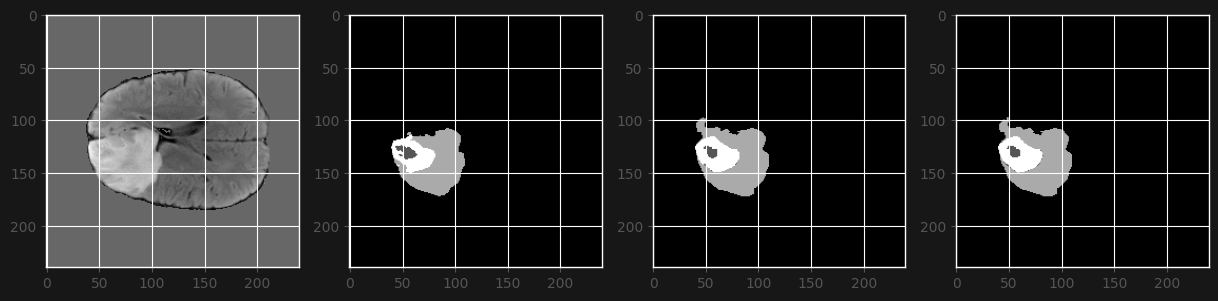

In [222]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
axes[0].imshow(image[0,:,:,78],cmap='gray')
axes[1].imshow(mask[:,:,78],cmap='gray')
axes[2].imshow(pred_mask_16[:,:,78],cmap='gray')
axes[3].imshow(pred_mask_16_[:,:,78],cmap='gray')



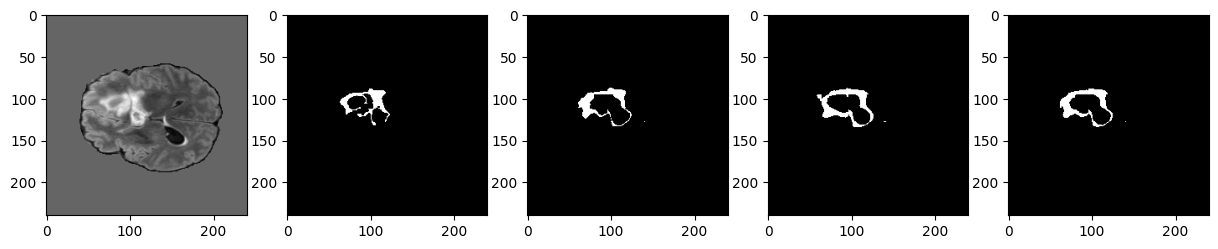

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
axes[0].imshow(image[0,:,:,78],cmap='gray')
axes[1].imshow(mask[:,:,78]==2,cmap='gray')
axes[2].imshow(pred_mask_16[:,:,78]==2,cmap='gray')
axes[3].imshow(pred_mask_32[:,:,78]==2,cmap='gray')
axes[4].imshow(pred_mask_mean[:,:,78]==2,cmap='gray')

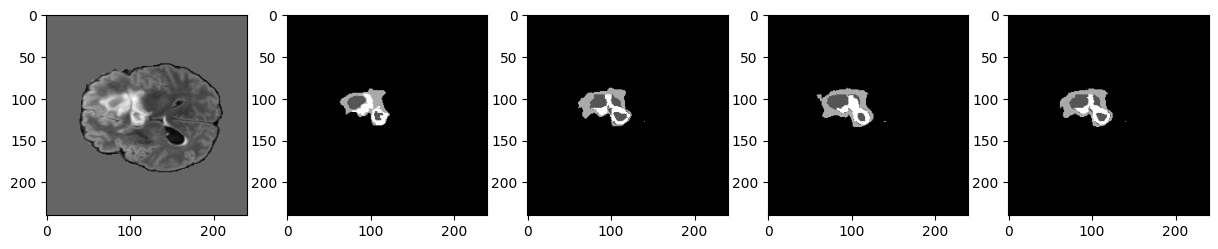

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
axes[0].imshow(image[0,:,:,78],cmap='gray')
axes[1].imshow(mask[:,:,78],cmap='gray')
axes[2].imshow(pred_mask_16[:,:,78],cmap='gray')
axes[3].imshow(pred_mask_32[:,:,78],cmap='gray')
axes[4].imshow(pred_mask_mean[:,:,78],cmap='gray')



In [2]:
from omegaconf import OmegaConf
import hydra
from src.models.patch_tumor_pred_diffusion_module_simpl import PatchTumorDiffusionLitModule


In [249]:
model_cfg_path = '/home/sanyal/Projects/BraTS3DDiff/configs/model/swinunetr_patch_tumor_classify_diffusion.yaml'
model_cfg = OmegaConf.load(model_cfg_path)


In [206]:
model_cfg.scheduler.max_epochs = 5
model_cfg.net.in_channels = 7
model_cfg.net.out_channels = 3
model_cfg.sampler.diffusion_steps = 1000
model_cfg.inferer.roi_size = [128,128,128]
model_cfg.extra_kwargs.roi_size = [128,128,128]
model_cfg.extra_kwargs.patch_sizes = [16, 32]
model_cfg.embed_net.img_size = [128,128,128]
model_cfg.extra_kwargs.num_targets = 3
model_cfg.extra_kwargs.patch_thresh = 0.50





In [187]:
print(OmegaConf.to_yaml(model_cfg))

_target_: src.models.patch_tumor_pred_diffusion_module_simpl.PatchTumorDiffusionLitModule
optimizer:
  _target_: torch.optim.AdamW
  _partial_: true
  lr: 0.0001
  weight_decay: 0.001
scheduler:
  _target_: src.scheduler.lr_scheduler.LinearWarmupCosineAnnealingLR
  _partial_: true
  warmup_epochs: 30
  max_epochs: 5
net:
  _target_: src.models.networks.unet.patch_denoise_unet.PatchDenoiseUNet
  spatial_dims: 3
  in_channels: 7
  out_channels: 3
  features:
  - 64
  - 64
  - 128
  - 256
  - 512
  - 64
  act: LeakyReLU
  norm: instance
  dropout: 0.0
  upsample: deconv
embed_net:
  _target_: src.models.networks.swinunetr.swinunetr_enc.SwinUNETREnc
  img_size:
  - 128
  - 128
  - 128
  in_channels: 4
  out_channels: 1
  depths:
  - 2
  - 4
  - 2
  - 2
  num_heads:
  - 3
  - 6
  - 12
  - 24
  feature_size: 24
  norm_name: instance
  drop_rate: 0.0
  attn_drop_rate: 0.0
  dropout_path_rate: 0.0
  normalize: true
  use_checkpoint: false
  spatial_dims: 3
  downsample: merging
  use_v2: false

In [207]:
model = hydra.utils.instantiate(model_cfg)

BasicUNet features: (64, 64, 128, 256, 512, 64).


In [208]:
extra_kwargs = model.hparams.extra_kwargs

In [222]:
model.hparams.extra_kwargs

{'num_targets': 3, 'roi_size': [128, 128, 128], 'sampling_type': 'ddim_sample_uncer_aware', 'uncer_step': 4, 'patch_sizes': [16, 32], 'patch_emb_size': 8, 'microbatch': -1, 'patch_thresh': 0.5, 'subregions_names': ['WT', 'TC', 'ET']}

In [209]:
ckpt = '/home/sanyal/Projects/BraTS3DDiff/logs/bratseg_logs/patch_diffusion/BraTS23-SwinUnetR-512-patch_tumor_classify_diffusion_roi_128_lr=0.001/train/runs/2024-09-27_18-27-30/csv/version_0/checkpoints/epoch=230-step=114576.ckpt'
model = PatchTumorDiffusionLitModule.load_from_checkpoint(ckpt)

In [210]:
model.hparams.extra_kwargs = extra_kwargs

In [307]:
with open('/home/sanyal/Projects/BraTS3DDiff/configs/data/brats23_patch_tumor_classify_diffusion.yaml') as f:
    cfg = yaml.safe_load(f)
cfg.pop('_target_')
cfg['data_dir'] = '/home/sanyal/Projects/BraTS3DDiff/data/BraTS-Data/BraTS2023-GLI'
cfg['batch_size'] = 1
a = BraTSDataModule(**cfg)

test_data = a.data_test
val_data = a.data_val

data = val_data.__getitem__(37)

In [271]:
image, mask, fg = data['image'], data['mask'], data['foreground']

In [308]:
image, mask, fg, patch_tumor_labels = data['image'], data['mask'], data['foreground'], data['patch_tumor_labels']

In [273]:
image.shape

torch.Size([4, 128, 128, 128])

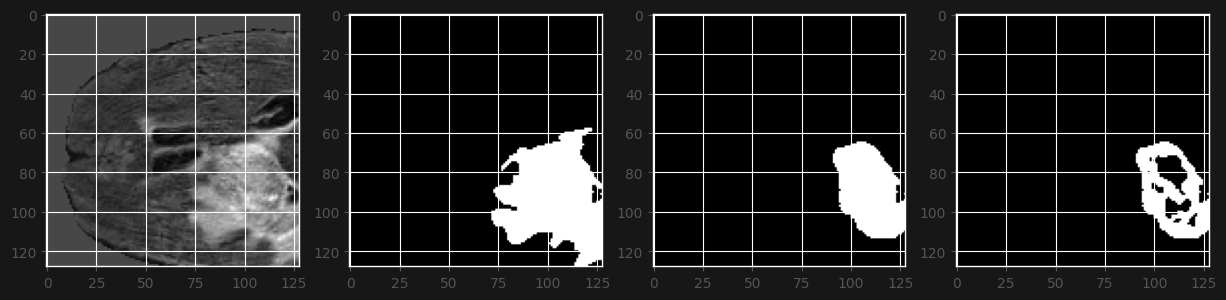

In [309]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
axes[0].imshow(image[0,:,:,78],cmap='gray')
axes[1].imshow(mask[0,:,:,78],cmap='gray')
axes[2].imshow(mask[1,:,:,78],cmap='gray')
axes[3].imshow(mask[2,:,:,78],cmap='gray')

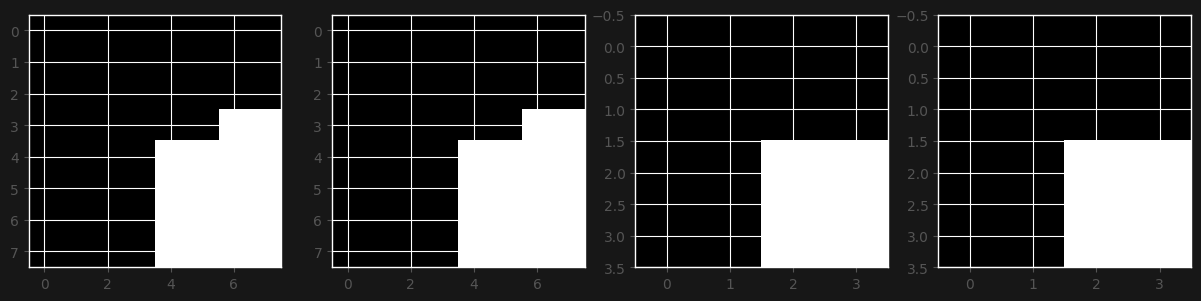

In [318]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
axes[0].imshow(patch_tumor_labels[16][0,:,:,4],cmap='gray')
axes[1].imshow(patch_tumor_labels[16][0,:,:,4],cmap='gray')
axes[2].imshow(patch_tumor_labels[32][0,:,:,3],cmap='gray')
axes[3].imshow(patch_tumor_labels[32][0,:,:,3],cmap='gray')

In [311]:
model = model.to('cuda')
image = image.to('cuda')
image = image.unsqueeze(0)

In [327]:
patches_embeddings, patches_pred_labels = model.forward(image=image,pred_type='patch_embeddings')
#patches_pred_labels = {k: v.sigmoid().detach().cpu().numpy() for k,v in patches_pred_labels.items()}
patches_pred_labels = {k: v.sigmoid().gt(0.95).detach().cpu().numpy() for k,v in patches_pred_labels.items()}

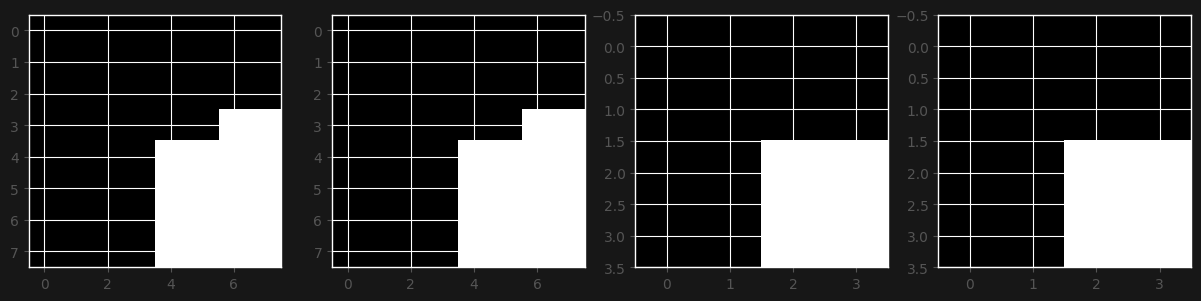

In [328]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
axes[0].imshow(patches_pred_labels[16][0,0,:,:,4],cmap='gray')
axes[1].imshow(patches_pred_labels[16][0,0,:,:,4],cmap='gray')
axes[2].imshow(patches_pred_labels[32][0,0,:,:,3],cmap='gray')
axes[3].imshow(patches_pred_labels[32][0,0,:,:,3],cmap='gray')

In [326]:
patches_pred_labels[16][0,0,:,:,4]

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True]])

In [314]:
out = model.predict_seg_mask(image)

{'num_targets': 3, 'roi_size': [128, 128, 128], 'sampling_type': 'ddim_sample_uncer_aware', 'uncer_step': 4, 'patch_sizes': [16, 32], 'patch_emb_size': 8, 'microbatch': -1, 'patch_thresh': 0.5, 'subregions_names': ['WT', 'TC', 'ET']}


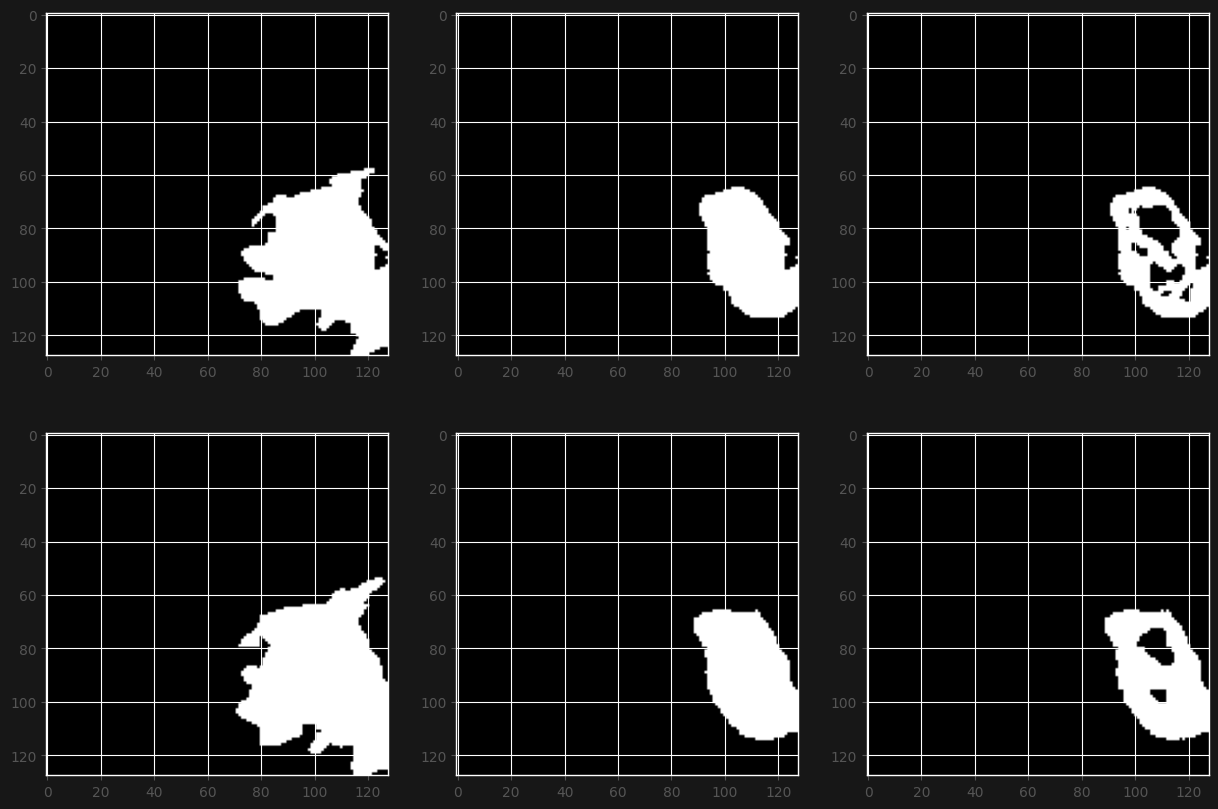

In [315]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i in range(3):
    axes[0][i].imshow(mask[i,:,:,78],cmap='gray')
for i in range(3):
    axes[1][i].imshow(out['res=16'][0,i,:,:,78].sigmoid().gt(0.5).detach().cpu().numpy(),cmap='gray')
plt.show()

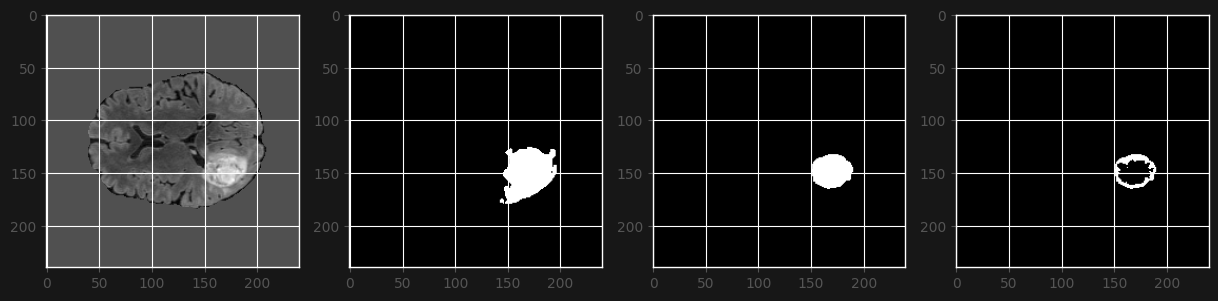

In [241]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
axes[0].imshow(image[0,:,:,78],cmap='gray')
axes[1].imshow(mask[0,:,:,78],cmap='gray')
axes[2].imshow(mask[1,:,:,78],cmap='gray')
axes[3].imshow(mask[2,:,:,78],cmap='gray')


In [67]:
model.hparams.extra_kwargs

{'num_targets': 3, 'roi_size': [128, 128, 128], 'sampling_type': 'ddim_sample_uncer_aware', 'uncer_step': 4, 'patch_sizes': [16, 32], 'patch_emb_size': 8, 'microbatch': -1, 'patch_thresh': 0.95, 'subregions_names': ['WT', 'TC', 'ET']}

In [242]:
model = model.to('cuda')
image = image.to('cuda')

In [243]:
model = model.to('cuda')
image = image.to('cuda')
out = model.inferer(inputs=image.unsqueeze(0), network=model.predict_seg_mask)

{'num_targets': 3, 'roi_size': [128, 128, 128], 'sampling_type': 'ddim_sample_uncer_aware', 'uncer_step': 4, 'patch_sizes': [16, 32], 'patch_emb_size': 8, 'microbatch': -1, 'patch_thresh': 0.5, 'subregions_names': ['WT', 'TC', 'ET']}
{'num_targets': 3, 'roi_size': [128, 128, 128], 'sampling_type': 'ddim_sample_uncer_aware', 'uncer_step': 4, 'patch_sizes': [16, 32], 'patch_emb_size': 8, 'microbatch': -1, 'patch_thresh': 0.5, 'subregions_names': ['WT', 'TC', 'ET']}
{'num_targets': 3, 'roi_size': [128, 128, 128], 'sampling_type': 'ddim_sample_uncer_aware', 'uncer_step': 4, 'patch_sizes': [16, 32], 'patch_emb_size': 8, 'microbatch': -1, 'patch_thresh': 0.5, 'subregions_names': ['WT', 'TC', 'ET']}
{'num_targets': 3, 'roi_size': [128, 128, 128], 'sampling_type': 'ddim_sample_uncer_aware', 'uncer_step': 4, 'patch_sizes': [16, 32], 'patch_emb_size': 8, 'microbatch': -1, 'patch_thresh': 0.5, 'subregions_names': ['WT', 'TC', 'ET']}
{'num_targets': 3, 'roi_size': [128, 128, 128], 'sampling_type':

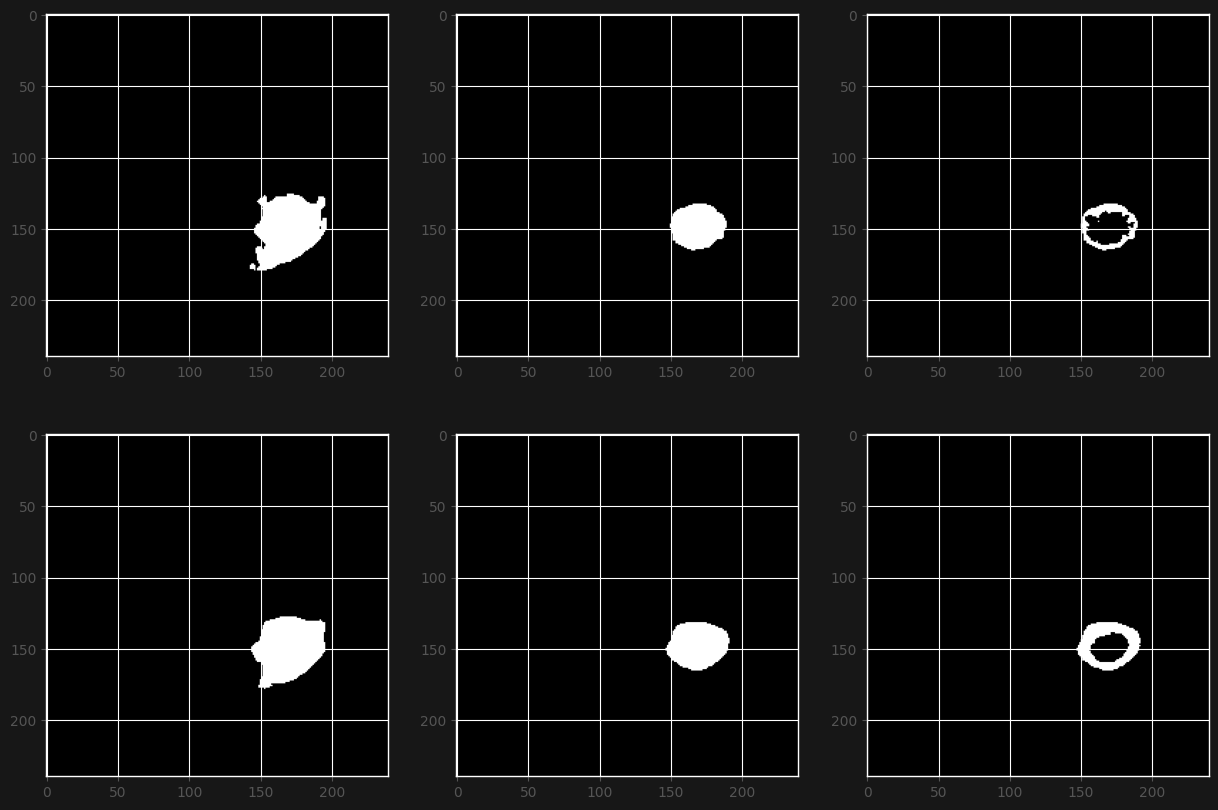

In [248]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i in range(3):
    axes[0][i].imshow(mask[i,:,:,78],cmap='gray')
for i in range(3):
    axes[1][i].imshow(out['res=32'][0,i,:,:,78].sigmoid().gt(0.5).detach().cpu().numpy(),cmap='gray')
plt.show()

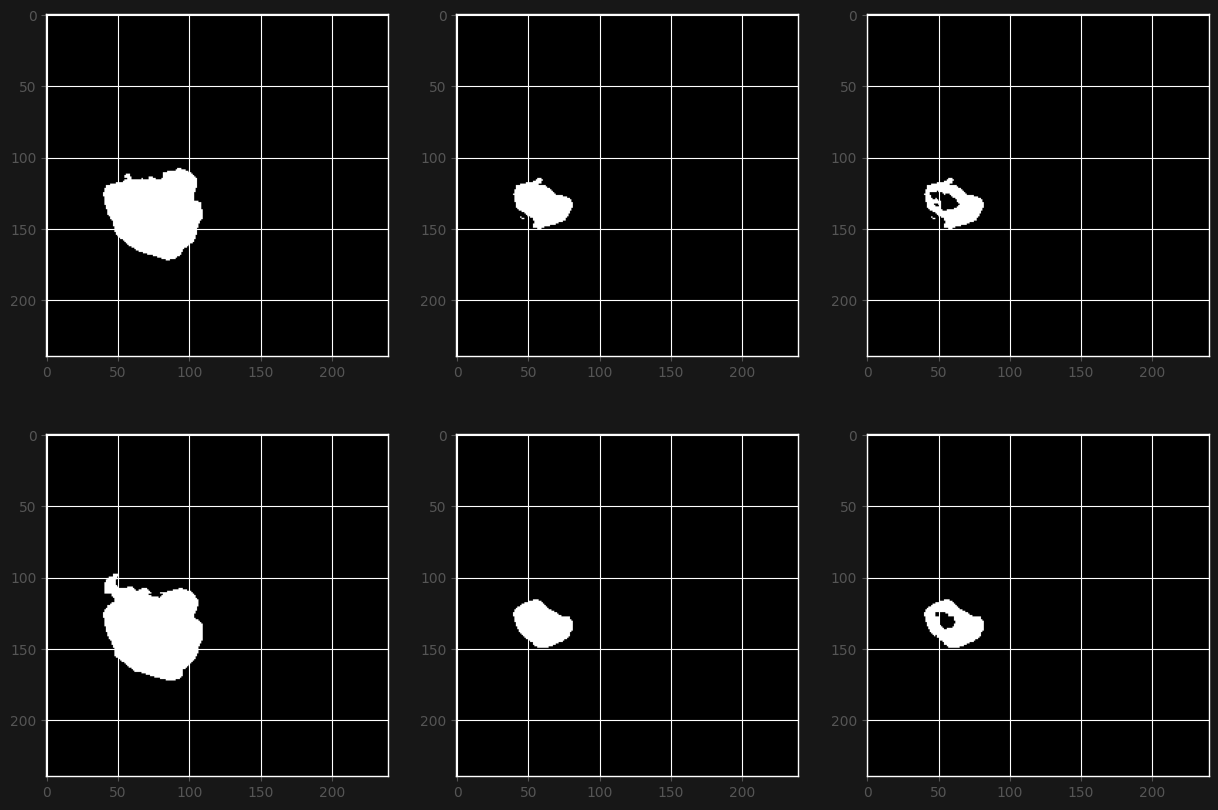

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i in range(3):
    axes[0][i].imshow(mask[i,:,:,78],cmap='gray')
for i in range(3):
    axes[1][i].imshow(out['res=16'][0,i,:,:,78].sigmoid().gt(0.5).detach().cpu().numpy(),cmap='gray')
plt.show()

In [29]:
out

{'res=16': metatensor([[[[[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,
               0.0000],
            [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,
               0.0000],
            [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,
               0.0000],
            ...,
            [-60.0376, -60.2207, -59.9851,  ...,   0.0000,   0.0000,
               0.0000],
            [-60.0556, -60.2348, -60.2244,  ...,   0.0000,   0.0000,
               0.0000],
            [-60.1600, -60.2529, -60.1267,  ...,   0.0000,   0.0000,
               0.0000]],
 
           [[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,
               0.0000],
            [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,
               0.0000],
            [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,
               0.0000],
            ...,
            [-59.4582, -60.2109, -60.0983,  ...,   0.0000,   0.0000,
               0.0000],
            [-60.03